# Visual analysis
This notebook contains all the visualization used within the thesis.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [49]:
def plot_fairness_metrics(data, label_pos, label_fair_pos_metrics, label_fair_di_pos, label_fair_index=None):
    if label_fair_index is None:
        label_fair_index = data.index.max()

    # Set up the color palette
    palette = sns.color_palette("husl", len(data.columns))
    
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plotting metrics except disparate impact
    non_disparate_metrics = data.columns[data.columns != "disparate_impact"]
    for i, metric in enumerate(non_disparate_metrics):
        axes[0].plot(data.index, data[metric], label=metric.replace('_', ' ').title(), color=palette[i])

    # Add a horizontal dotted line at y=0 with label "Fair"
    axes[0].axhline(y=0, color='black', linestyle='--')
    axes[0].text(x=label_fair_index, y=label_fair_pos_metrics, s="Fair", color='black', ha='left', va='center', fontsize=10)

    # Set y-axis limit between -1 and 1 for the first plot
    axes[0].set_ylim(-1.05, 1.05)

    axes[0].set_xlabel("Penalty", fontsize=12)
    axes[0].set_ylabel("Metric Value", fontsize=12)
    axes[0].set_title("Bias Metrics vs. Penalty", fontsize=14)
    axes[0].grid(True)
    axes[0].tick_params(axis="x", rotation=45)
    
    # Plotting disparate impact
    axes[1].plot(data.index, data["disparate_impact"], label="Disparate Impact", color='purple')

    # Add a horizontal dotted line at y=0.8 with label "Fair"
    axes[1].axhline(y=0.8, color='black', linestyle='--')
    axes[1].text(x=label_fair_index, y=label_fair_di_pos, s="Fair", color='black', ha='left', va='center', fontsize=10)

    # axes[1].set_ylim(0, 10)

    axes[1].set_xlabel("Penalty", fontsize=12)
    axes[1].set_ylabel("Disparate Impact Value", fontsize=12)
    axes[1].set_title("Disparate Impact vs. Penalty", fontsize=14)
    axes[1].grid(True)
    axes[1].tick_params(axis="x", rotation=45)

    # Combine legends from both plots
    handles, labels = axes[0].get_legend_handles_labels()
    handles.extend(axes[1].get_legend_handles_labels()[0:1])  # Add disparate impact handle from second plot
    labels.extend(["Disparate Impact"])

    # Set the legend in the first subplot
    axes[0].legend(handles, labels, title="Metrics", loc=label_pos, fontsize=10)

    plt.tight_layout()
    plt.show()

In [50]:
def load_data(path):
    with open(path, "r") as f:
        data = json.load(f)
    df = pd.DataFrame.from_dict(data)
    df.index = df.index.astype(str)
    return df

/var/folders/5s/7wthnl510p9_gg2ytrfvxy180000gn/T/ipykernel_81849/2702525629.py:49: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  axes[0].legend(handles, labels, title="Metrics", loc=label_pos, fontsize=10)


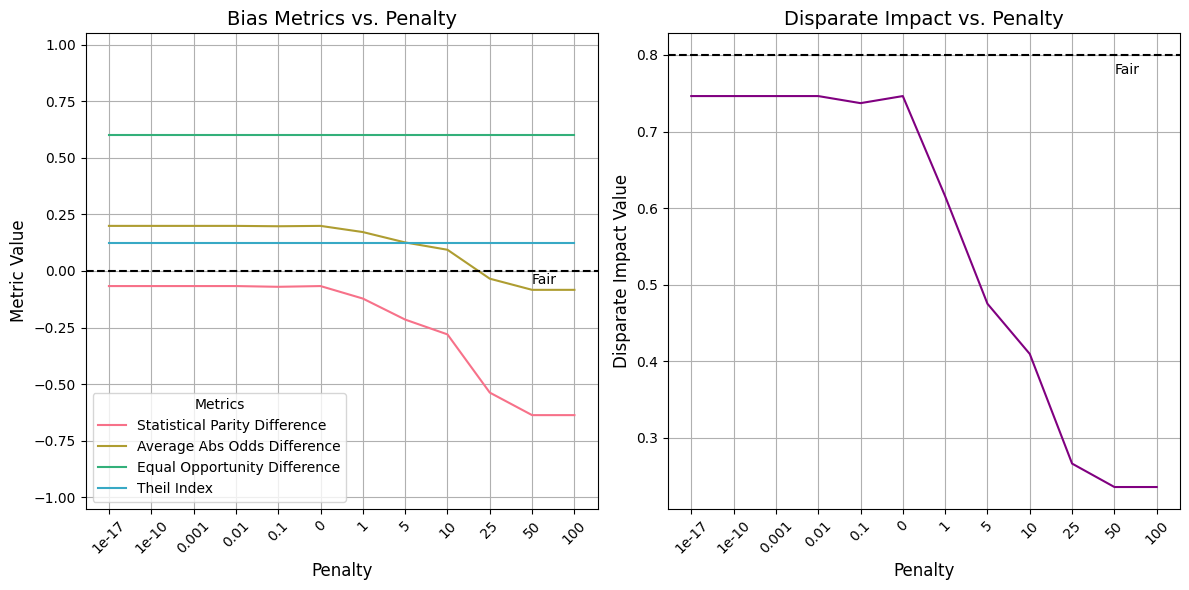

In [51]:
plot_fairness_metrics(load_data("results/fairness_metrics_original.json"), "lower left", -0.04, 0.78, )

/var/folders/5s/7wthnl510p9_gg2ytrfvxy180000gn/T/ipykernel_81849/2702525629.py:49: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  axes[0].legend(handles, labels, title="Metrics", loc=label_pos, fontsize=10)


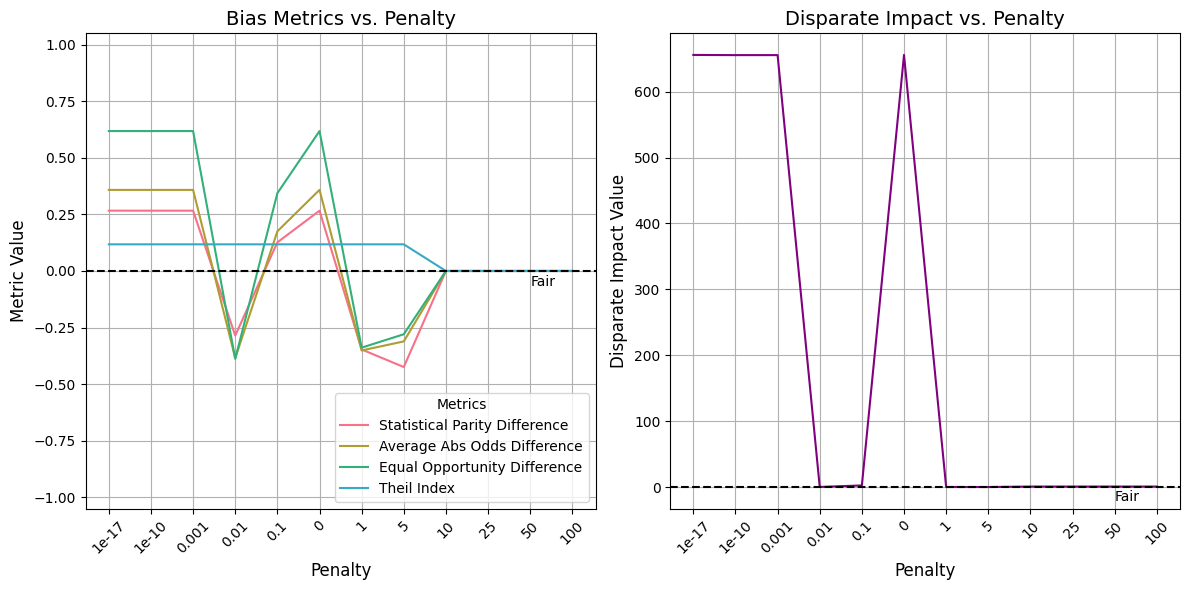

In [52]:
plot_fairness_metrics(load_data("results/fairness_metrics_original_cleaned.json"), "lower right", -0.05, -15)

/var/folders/5s/7wthnl510p9_gg2ytrfvxy180000gn/T/ipykernel_81849/2702525629.py:49: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  axes[0].legend(handles, labels, title="Metrics", loc=label_pos, fontsize=10)


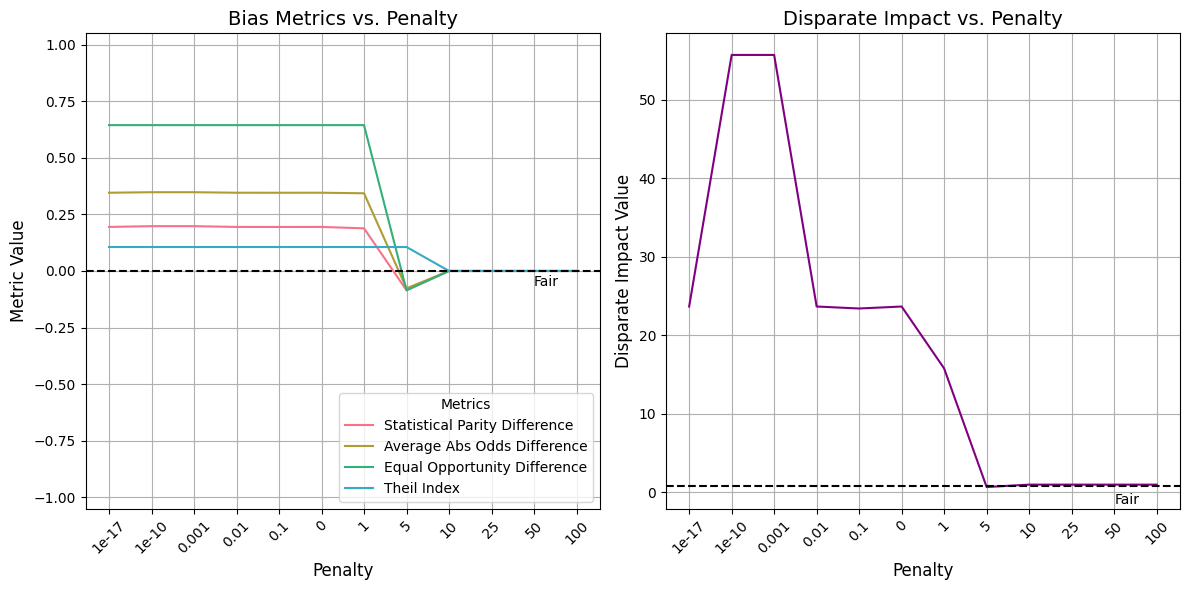

In [53]:
plot_fairness_metrics(load_data("results/fairness_metrics_original_pdf.json"), "lower right", -0.05, -1)

/var/folders/5s/7wthnl510p9_gg2ytrfvxy180000gn/T/ipykernel_81849/2702525629.py:49: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  axes[0].legend(handles, labels, title="Metrics", loc=label_pos, fontsize=10)


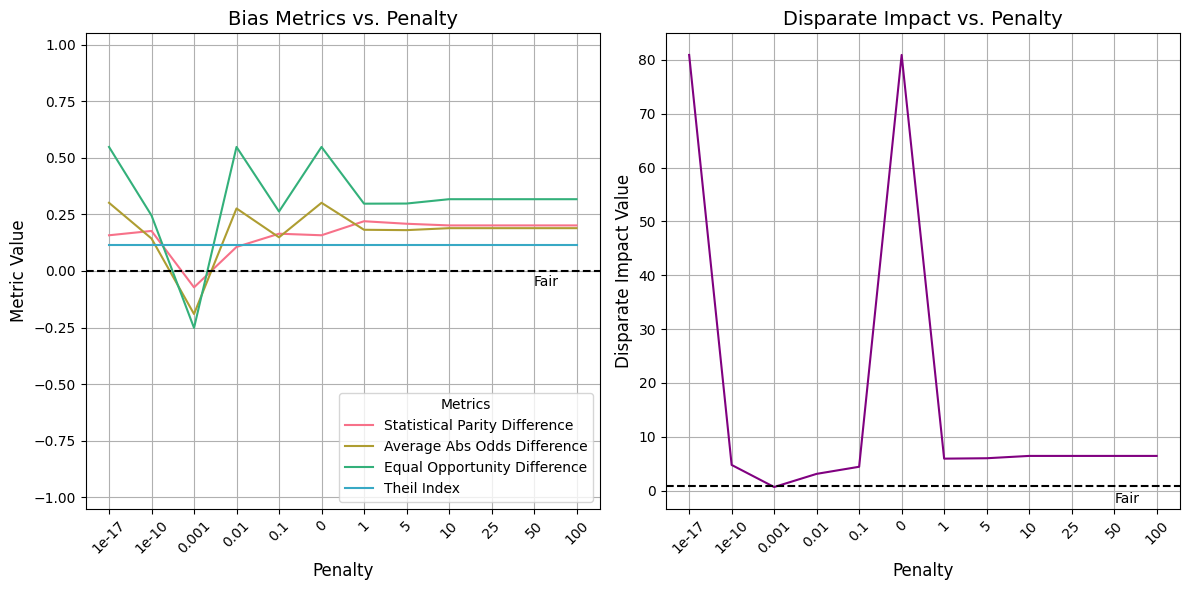

In [54]:
plot_fairness_metrics(load_data("results/fairness_metrics_synthetic.json"), "lower right", -0.05, -1.5)

/var/folders/5s/7wthnl510p9_gg2ytrfvxy180000gn/T/ipykernel_81849/2702525629.py:49: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  axes[0].legend(handles, labels, title="Metrics", loc=label_pos, fontsize=10)


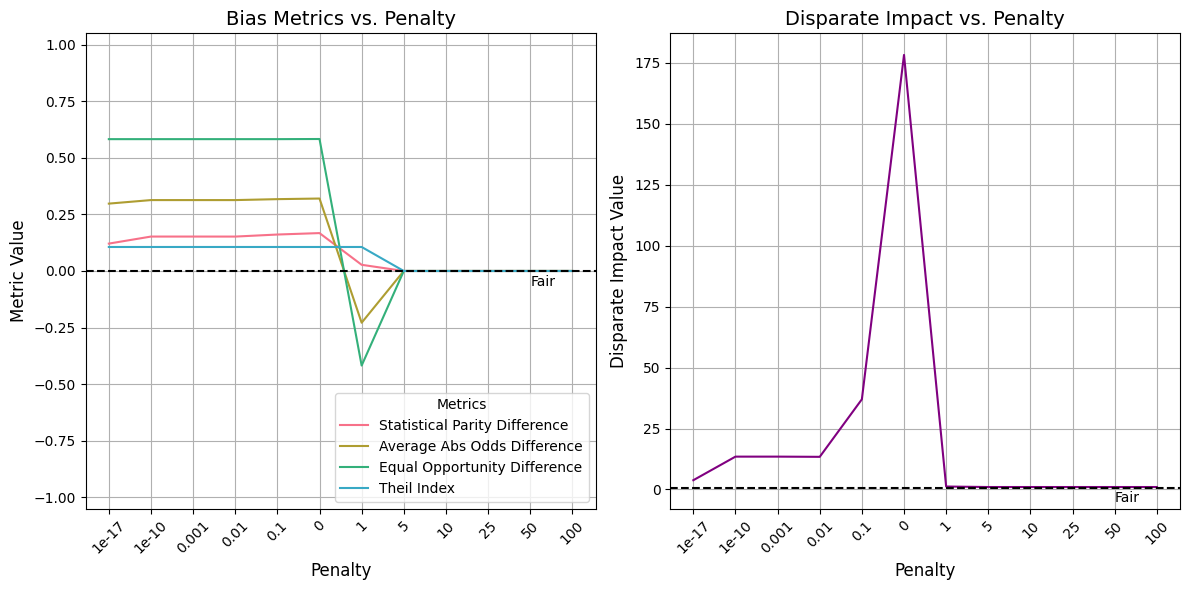

In [55]:
plot_fairness_metrics(load_data("results/fairness_metrics_synthetic_cleaned.json"), "lower right", -0.05, -3.5)

/var/folders/5s/7wthnl510p9_gg2ytrfvxy180000gn/T/ipykernel_81849/2702525629.py:49: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  axes[0].legend(handles, labels, title="Metrics", loc=label_pos, fontsize=10)


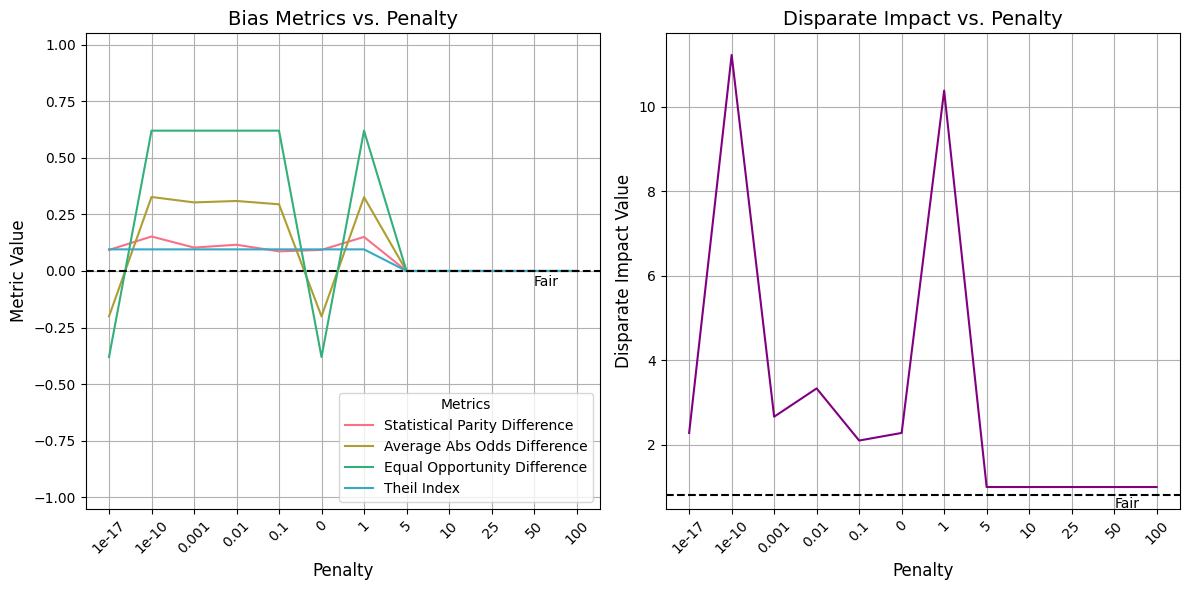

In [56]:
plot_fairness_metrics(load_data("results/fairness_metrics_synthetic_pdf.json"), "lower right", -0.05, 0.6)

/var/folders/5s/7wthnl510p9_gg2ytrfvxy180000gn/T/ipykernel_81849/2702525629.py:49: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  axes[0].legend(handles, labels, title="Metrics", loc=label_pos, fontsize=10)


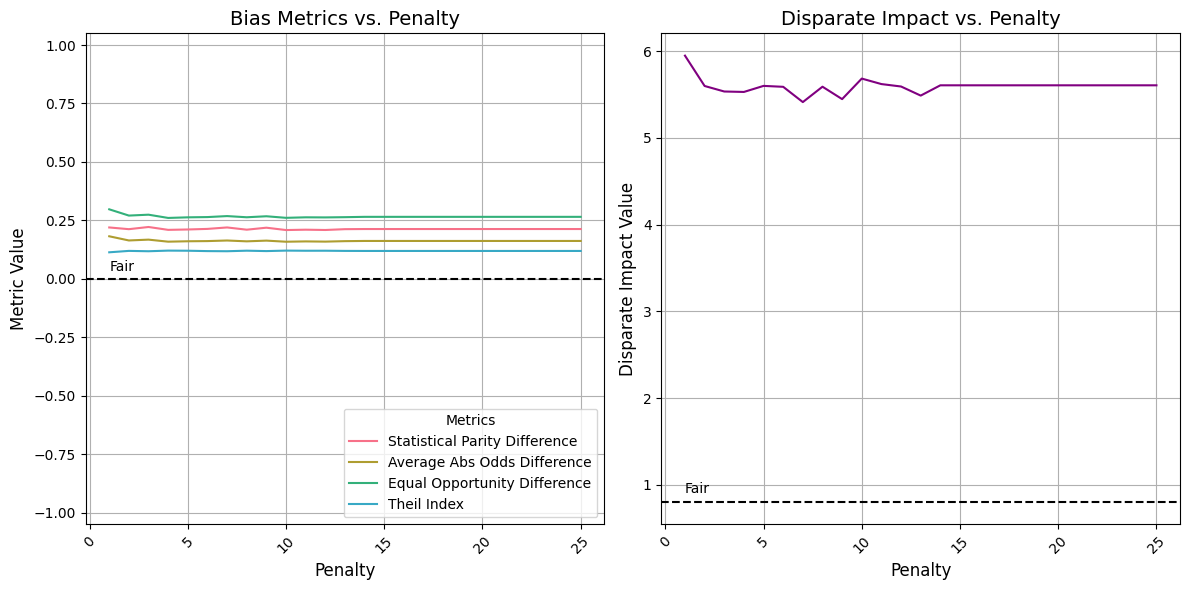

In [62]:
plot_fairness_metrics(df_fairness_metrics_loaded, "lower right", 0.05, 0.95, df_fairness_metrics_loaded.index.min())

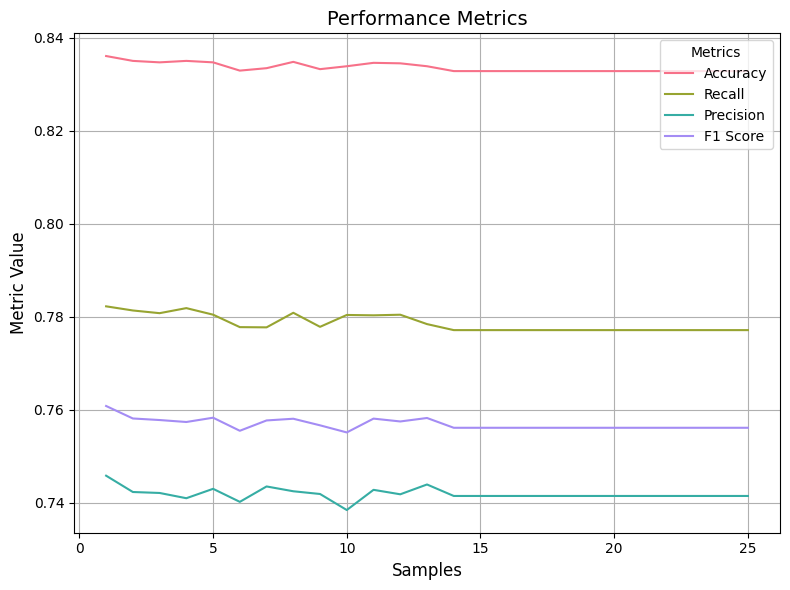

In [63]:
import seaborn as sns

# Define the plotting function for fairness metrics
def plot_metrics(data, label_pos):
    # Set up the color palette
    palette = sns.color_palette("husl", len(data.columns))

    # Set up the plot with one axis
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

    # Plotting all the metrics from the dataframe
    for i, metric in enumerate(data.columns):
        ax.plot(data.index, data[metric], label=metric.replace('_', ' ').title(), color=palette[i])

    ax.set_xlabel("Samples", fontsize=12)
    ax.set_ylabel("Metric Value", fontsize=12)
    ax.set_title("Performance Metrics", fontsize=14)
    ax.grid(True)
    ax.tick_params(axis="x")

    # Set the legend
    ax.legend(title="Metrics", loc=label_pos, fontsize=10)

    plt.tight_layout()
    plt.show()

df_metrics_loaded.columns = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
plot_metrics(df_metrics_loaded, label_pos='upper right')